- 导入函数库和数据集

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
SEED = 2017

- 加载数据集

In [3]:
data = pd.read_csv('data/winequality-red.csv')
y = data['quality']
X = data.drop(['quality'], axis=1)

- 将数据集分解为训练数据和测试数据

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

- 标准化输入

In [6]:
scaler = StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

- 定义模型和优化器

In [8]:
model = Sequential()
model.add(Dense(1024, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))

model.add(Dense(1, activation='linear'))

opt = SGD()

model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])


In [9]:
n_epochs = 500
batch_size = 256

history = model.fit(X_train.values, y_train, batch_size=batch_size, epochs=n_epochs, validation_split=0.2, verbose=0)


In [10]:
predictions = model.predict(X_test.values)
print('Test Accuracy: {:.2f}'.format(np.round(np.sum([y_test==predictions.flatten().round()])/y_test.shape[0]*100, 2)))

Test Accuracy: 60.62


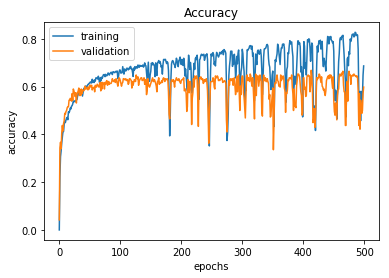

In [11]:
plt.plot(np.arange(len(history.history['acc'])), history.history['acc'], label='training')
plt.plot(np.arange(len(history.history['val_acc'])), history.history['val_acc'], label='validation')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc=0)
plt.show()